In [1]:
from numpy import loadtxt
import pandas as pd

# Load data from text file
data = loadtxt("phpbdata.txt", skiprows = 1)
pH = data[:,1] # value of pH
Pb = data[:,2] # level of lead Pb
n = len(pH) # number of observations

# For nice output of data
df = pd.DataFrame({"pH": pH, "Pb": Pb})
df

,pH,Pb
0,7.6,0.451
1,8.5,0.106
2,7.2,0.341
3,7.5,0.158
4,7.9,0.251
5,6.8,0.178
6,6.2,0.321
7,6.5,0.424
8,7.9,0.195
9,8.1,0.520


In [2]:
# Helper function for nice printing
def print_stat(name, fn):
    print("X pH: {}(X) = {:.1f}".format(name, fn(pH)))
    print("Y Pb: {}(Y) = {:.3f}".format(name, fn(Pb)))        

## 1 Descriptive Statistics

The data consist of two series of sample size $n = 48$. The data points or observations from one series will be denoted as $x_i, i = 1,...,n$. As far as practical, functions for the most basic statistics are written from scratch in this sheet. Otherwise, the NumPy and SciPy libraries for Python is utilised. 

### Mode
The mode is the most frequent observation.

In [3]:
def mode(x):
    uniqueobs = list(set(x)) # makes a list of the unique observations in x
    frequency = [0]*len(uniqueobs) # initialize list of frequencies
    
    for value in x:
        frequency[uniqueobs.index(value)] +=1
    
    i = frequency.index(max(frequency)) # index of most frequent observation
    return uniqueobs[i]

print_stat("mode", mode)

X pH: mode(X) = 7.2
Y Pb: mode(Y) = 0.424


### Median
The sample median is the middle value of values sorted in ascending order. 

In [4]:
def median(x):
    midpoint = round(n/2) # divide and rounds down
    if n % 2 == 1: 
        return sorted(x)[midpoint] # if length is odd return value at midpoint of sorted list 
    else:
        return (sorted(x)[midpoint -1] + sorted(x)[midpoint])/2 # if length is even return average of the two middle values

print_stat("median", median)

X pH: median(X) = 7.1
Y Pb: median(Y) = 0.322


### Mean
The sample mean is the arithmetic average of the values. 

In [5]:
def mean(x):
    s = 0
    for i in range(n):
        s+=x[i]
    return s/n

print_stat("Mean",mean)

X pH: Mean(X) = 7.0
Y Pb: Mean(Y) = 0.307


### Variance
The sample variance $s^2$ of observations $x_i , i = 1,...,n$ is defined as 
$$
s^2 = \sum_i^n \frac{(x_i-\bar x)^2}{n-1}
$$

In [6]:
def var(x):
    s = 0
    for i in range(n):
        s+= (x[i]-mean(x))**2
    return s/(n-1)

print_stat("variance", var)

X pH: variance(X) = 0.6
Y Pb: variance(Y) = 0.016


### Standard deviation
The sample standard deviation $s$ is the square root of the variance.

In [7]:
def stdev(x):
    return var(x)**(1/2)

print_stat("standard deviation", stdev)

X pH: standard deviation(X) = 0.8
Y Pb: standard deviation(Y) = 0.128


### Quantile
The empirical distribution function $F$ is the cumulative distribution function (CDF) that puts $1/n$ mass at each observation. The quantile function returns the smallest $x_i$ such that $F$ is larger than $q$. The first quartile, median and third quartile correspond to $q = \frac{1}{4}, \frac{1}{2}, \frac{3}{4}$.

In [8]:
# Calculates the empirical distribution function
def cdf(x):
    x = sorted(x)
    F = n*[0]
    for i in range(n):
        F[i] = sum(x <= x[i])/n # F[i] is the number of x's less than x[i] divided by n
    return F

In [9]:
# Returns the smallest value of x (i.e. first value in list sorted in ascending order) where F is larger than q
def quantile(x, q):
    F = cdf(x)
    for i in range(n):
        if F[i]>q:
            return sorted(x)[i]

def Q1(x):
    return quantile(x, .25)

def Q2(x):
    return quantile(x, .5)

def Q3(x):
    return quantile(x, 0.75)

print_stat("First quartile", Q1)
print_stat("Second quartile", Q2)
print_stat("Third quartile", Q3)

X pH: First quartile(X) = 6.5
Y Pb: First quartile(Y) = 0.203
X pH: Second quartile(X) = 7.1
Y Pb: Second quartile(Y) = 0.323
X pH: Third quartile(X) = 7.6
Y Pb: Third quartile(Y) = 0.424


In [10]:
# The second quartile and the median is the same
Q2(pH) == median(pH)

True

### Skewness

The sample skewness $b$ is defined as

$$
b = \frac{ \frac{1}{n} \sum_i^n (x_i- \bar x)^3}{s^3}.
$$

Negative skew indicates a long left tail, whereas positive skew indicates a long right tail of the distribution.

In [11]:
def skewness(x):
    s = 0
    for i in range(n):
        s += (x[i] - mean(x))**3
    return s/(n*stdev(x)**3)

print_stat("Skewness", skewness)

X pH: Skewness(X) = -0.3
Y Pb: Skewness(Y) = 0.064


Text(0.5, 0, 'Pb')

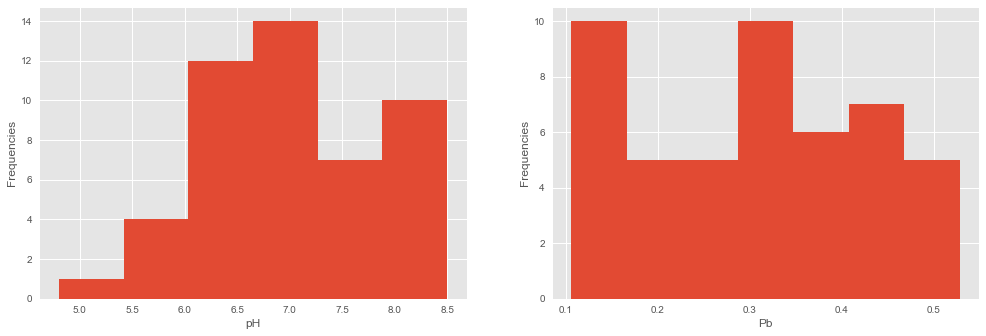

In [76]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use("ggplot")

plt.figure(figsize = (15,5))

plt.subplot(121)
plt.hist(pH, bins = 6)
plt.ylabel("Frequencies")
plt.xlabel("pH")

plt.subplot(122)
plt.hist(Pb, bins = 7)
plt.ylabel("Frequencies")
plt.xlabel("Pb")

## 2 Confidence interval

By the central limit theorem the sample mean is drawn from a normal distribution with variance $\frac{s^2}{n}$.

$$
Var(\frac{\sum_i^n x_i}{n}) = \frac{1}{n^2}\sum_i^n Var(x_i) = \frac{s^2}{n}
$$

The standard deviation of the sample mean is known as the standard error. A $1-\alpha$ confidence interval for an estimator will be able to trap the true value with a probability of $1-\alpha$.

In [43]:
from scipy.stats import norm, uniform, chisquare, chi2

def se(x):
    return stdev(x)/(n**(1/2)) 

print_stat("Standard error", se)

X pH: Standard error(X) = 0.1
Y Pb: Standard error(Y) = 0.018


In [44]:
# The significance level alpha is set to 0.05
alpha = 0.05

# Calculate the confidence interval around an estimate with significance level alpha
def confidence_mean(x, alpha):
    # Critical value from standard normal distribution
    z = norm.ppf(1-alpha/2)
    return mean(x) - z*se(x), mean(x) + z*se(x)

left, right = confidence_mean(pH, alpha)
print("X pH: Confidence interval around mean: ({:.2f}, {:.2f})".format(left,right))
left, right = confidence_mean(Pb, alpha)
print("Y Pb: Confidence interval around mean: ({:.2f}, {:.2f})".format(left,right))

X pH: Confidence interval around mean: (6.79, 7.24)
Y Pb: Confidence interval around mean: (0.27, 0.34)


If the sample variance $s^2$ is pulled from the stochastic variable $S^2$ as an estimator of the population variance $\sigma^2$, a test statistic $X^2$ for the variance is

$$
X^2 = \frac{(n-1)S^2}{\sigma^2} \sim \chi^2_{n-1}.
$$

In [45]:
def confidence_stdev(x, alpha):
    # Critical values from chi-square distribution
    left_critical = chi2.ppf(1 - alpha/2, df = n-1)
    right_critical = chi2.ppf(alpha/2, df = n-1)
    A = ((n-1)*var(x))/left_critical
    B = ((n-1)*var(x))/right_critical
    return A**(1/2), B**(1/2)

left, right = confidence_stdev(pH, alpha)
print("X pH: Confidence interval around standard deviation: ({:.2f}, {:.2f})".format(left,right))
left, right = confidence_stdev(Pb, alpha)
print("Y Pb: Confidence interval around standard deviation: ({:.2f}, {:.2f})".format(left,right))

X pH: Confidence interval around standard deviation: (0.67, 1.01)
Y Pb: Confidence interval around standard deviation: (0.11, 0.16)


## 3 Test of Hypothesis

$$
\begin{align}
&H_0: \mu = 7.0 \\
&H_1: \mu \neq 7.0
\end{align}
$$

In [46]:
mu = 7.0

If $H_0$ is true, $\bar{X}$ should be normally distributed with expectation equal to $\mu$ and standard deviation equal $\frac{s}{\sqrt{n}}$. By shifting and scaling,the test statistic $Z$ is standard normal distributed.
$$
Z = \frac{\bar{X} - \mu}{s/\sqrt{n}}
$$

In performing the test of hypothesis, $\alpha$ is the probability of committing a type 1 error i.e. to reject $H_0$ while it is true. For a standard normal distribution this corresponds to drawing a value more than $z_{\alpha/2}$ removed from 0. Thus the decision criterion for the two-sided test is to reject $H_0$ if $|z|>z_{\alpha/2}$.

In [47]:
z_critical = norm.ppf(1-alpha/2) # Probability (1 - alpha/2) is to the left of this value
print("Critical value of z: {:.2f}".format(z_critical))

Critical value of z: 1.96


In [48]:
z = (mean(pH)-mu)/se(pH)
abs(z) > z_critical

False

$H_0$ is not rejected. 

$$
\begin{align}
&H_0: \mu = 7.0 \\
&H_1: \mu > 7.0
\end{align}
$$
The decision criterion for this one-sided test is to reject $H_0$ if $|z|>z_{\alpha}$

In [49]:
z_critical = norm.ppf(1-alpha)
print("Critical value of z: {:.2f}".format(z_critical))

Critical value of z: 1.64


In [68]:
abs(z) > z_critical

False

$H_0$ is not rejected. 

## 4 $\chi^2$ test
Split the observations in $k$ bins, each containing $N_j$ number of observations for $j = 1,...,k$. Under a null hypothesis $H_0$ the observations are drawn from a distribution with probability $p_j$ for finding an observation in bin $j$, resulting in expected number of observations $E(N_j) = E_j = np_j$. A test statistic $T$ is $\chi^2$ distributed with $k-1$ degrees of freedom:

$$
T = \sum_j^k \frac{(N_j - E_j)^2}{E_j} \sim \chi^2_{k-1}
$$

In [0]:
def get_bins(x, k):

    h = (max(x) - min(x))/k
    return [min(x) + j*h for j in range(k+1)]

def expected(x, bins, k, dist):
    # Set stochastic (random) variable of distribution
    if dist == "normal":
        rv = norm(loc = mean(x), scale = stdev(x))
    elif dist == "uniform":
        rv = uniform(min(x), max(x))
    
    print(rv)
    E = k*[0]
    p = k*[0]

    for j in range(k):
        # The probability for cell j is the Cumulutative Density Function (CDF)
        # at the right boundary minus the CDF at left boundary of bin
        p[j] = rv.cdf(bins[j+1])-rv.cdf(bins[j])
        E[j] = round(n*p[j], ndigits = 1)
    print(p)
    return E

def observed(x, bins, k): 
    N = k*[0]
    x = sorted(x)
    
    i = 0
    for j in range(k):
        while x[i] >= bins[j] and x[i] <= bins[j+1]:
            N[j] += 1
            i += 1
            if i == n:
                break
    return N

def chi_square_statistic(observed, expected):
    T = 0

    for n, e in zip(observed,expected):
        T += (n-e)**2/e
    
    return T

In [69]:
k = 6

bins = get_bins(pH,k)
N = observed(pH, bins, k)
E = expected(pH, bins, k, "normal")

bins_string = [str(round(bins[j], ndigits = 2))+" - "+str(round(bins[j+1], ndigits = 2)) for j in range(k)]
pd.DataFrame({"Observed": N, "Expected:": E}, index = bins_string )

[0.020299649701894455, 0.08725260705646293, 0.21358123315849475, 0.298158175062767, 0.23750220470134342, 0.1079102148695994]


,Observed,Expected:
4.8 - 5.42,1,1.0
5.42 - 6.03,4,4.2
6.03 - 6.65,12,10.3
6.65 - 7.27,14,14.3
7.27 - 7.88,7,11.4
7.88 - 8.5,10,5.2


A rule of thumb is that the frequencies should not be below 5, therefore let's combine the two upmost bins. 

In [70]:
k = 5
bins.pop(1)
N = observed(pH, bins, k)
E = expected(pH, bins, k, "normal")

bins_string = [str(round(bins[j], ndigits = 2))+" - "+str(round(bins[j+1], ndigits = 2)) for j in range(k)]
pd.DataFrame({"Observed": N, "Expected:": E}, index = bins_string )

[0.10755225675835739, 0.21358123315849475, 0.298158175062767, 0.23750220470134342, 0.1079102148695994]


,Observed,Expected:
4.8 - 6.03,5,5.2
6.03 - 6.65,12,10.3
6.65 - 7.27,14,14.3
7.27 - 7.88,7,11.4
7.88 - 8.5,10,5.2


The decision criterion is to reject $H_0$ if $t > \chi^2_{\alpha, k-1}$.

In [73]:
chi2_critical = chi2.ppf(1 - alpha, k - 1)
print("Critical value of chi2: {:.2f} ".format(chi2_critical))

Critical value of chi2: 12.59 


In [74]:
t = chi_square_statistic(N, E)
t > chi2_critical

False

The null hypothesis - that the pH data are drawn from a normal distribution - is retained.  

In [71]:
k = 7

bins = get_bins(Pb,k)
N = observed(Pb, bins, k)
E = expected(Pb, bins, k, "uniform")

bins_string = [str(round(bins[j], ndigits = 2))+" - "+str(round(bins[j+1], ndigits = 2)) for j in range(k)]
pd.DataFrame({"Observed": N, "Expected:": E}, index = bins_string )

[0.11417748917748918, 0.11417748917748921, 0.11417748917748918, 0.11417748917748916, 0.11417748917748916, 0.11417748917748927, 0.11417748917748916]


,Observed,Expected:
0.11 - 0.17,10,5.5
0.17 - 0.23,5,5.5
0.23 - 0.29,5,5.5
0.29 - 0.35,10,5.5
0.35 - 0.41,6,5.5
0.41 - 0.47,7,5.5
0.47 - 0.53,5,5.5


In [0]:
chi2_critical = chi2.ppf(1 - alpha, k - 1)
print("Critical value of chi2: {:.2f} ".format(chi2_critical))

Again, the decision criterion is to reject $H_0$ if $t > \chi^2_{\alpha, k-1}$.

In [72]:
t = chi_square_statistic(N, E)
t > chi2_critical

False

The null hypothesis - that the Pb data is drawn from an uniform distribution - is retained.

## 5 Regression

In [0]:
import numpy as np
from numpy.linalg import inv

Stack an array of 1's to $X$ to create a matrix for the covariate including the intercept. 

In [0]:
x = pH
Y = Pb
X = np.column_stack((np.ones(n),x))

The coefficient vector $(a,b)^T = (X^TX)^{-1}X^TY$

In [0]:
a, b = np.matmul(inv(np.matmul(X.T,X)),np.matmul(X.T,Y))

def yhat(x):
    return a + b*x

Text(0, 0.5, 'Pb')

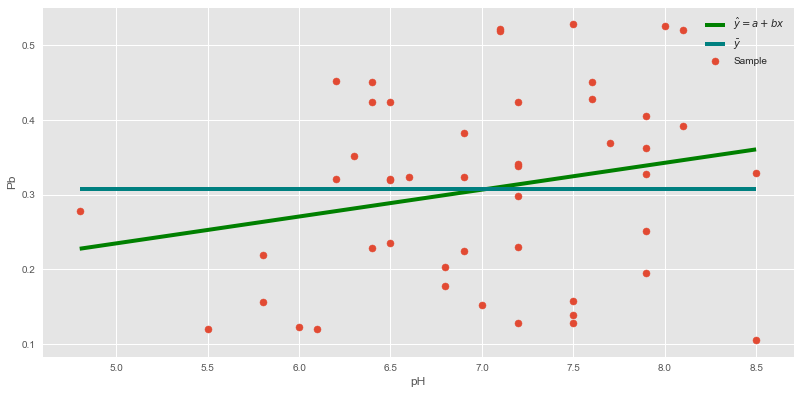

In [81]:
xx = np.linspace(np.min(pH),np.max(pH),100)
plt.figure(figsize = (12,6))
plt.plot(xx, yhat(xx), color = "green", label = r"$\hat y = a + bx$")
plt.plot(xx, np.ones(100)*mean(Y), color = "teal", label = r"$\bar y$")
plt.scatter(x, Y, label = "Sample")
plt.legend()
plt.xlabel("pH")
plt.ylabel("Pb")

An unbiased estimator of the variance $\sigma^2$ of $Y$ is

$$
s^2 = \frac{RSS}{n-2} = \sum_{i=1}^n \frac{(y_i - \hat y_i)^2}{n - 2}.
$$

RSS denotes the Residual Sum of Squares, while TSS denotes the Total Sum of Squares. 

In [0]:
def RSS(y, x):
    s = 0
    for i in range(n):
        s += (y[i] - yhat(x[i]))**2
    return s

def TSS(y, x):
    s = 0
    for i in range(n):
        s += (y[i] - mean(y))**2
    return s

def estimate_variance(y, x):
    return RSS(y, x)/(n-2) 

print("Estimate for variance of Y: {:.3f}".format(estimate_variance(Y, pH)))

In [0]:
print("The slope of x (pH) is {:.2f}".format(b))

The coefficient of determination $R^2$ can be interpreted as the variation explained by $x$ over the total variation of $Y$. 

$$
R^2 = 1 - \frac{RSS}{TSS}
$$

In [0]:
def R2(y, x):
    return 1 - RSS(y, x)/TSS(y, x)

print("Coefficient of determination: {:.2f}".format(R2(Y, x)))

The low value indicate that the linear regression model does not explain much of the variation of $Y$. 

The standardised residual is calculated as

$$
\frac{r_i}{\sqrt{\sum r_i^2/(n-1)}}
$$

where $r_i = y_i - \hat y_i$ is the residual of datapoint $i$. 

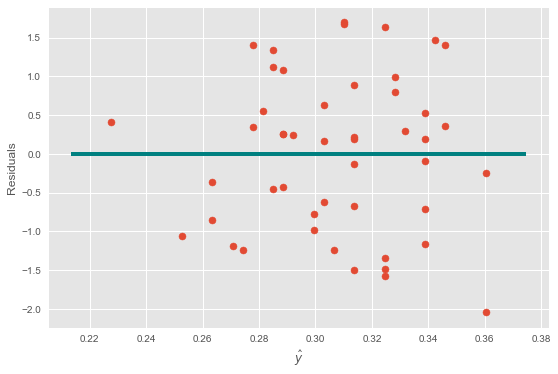

In [82]:
def stres(y, x):
    # Calculate residual
    r = y - yhat(x)

    # Standardise
    r /= np.sqrt(np.sum(r**2)/(n-1))

    return r

stresiduals = stres(Y, x)
plt.scatter(yhat(x), stresiduals)
plt.xlabel(r"$\hat y$")
plt.ylabel("Residuals")
plt.hlines(0, plt.xlim()[0], plt.xlim()[1], color = "teal")


The residuals are quite evenly spread. There is one unusually large residual of -2.

In [0]:
# This maximum value correspond to index
index = np.argmax(np.abs(stresiduals))
print(df.loc[index])

The outlier residual correspond to the smallest value of $Y$ in the data for Pb. 